In [17]:
from google.colab import files
uploaded = files.upload()


Saving internet_usage.csv to internet_usage (2).csv


In [18]:
import pandas as pd

df = pd.read_csv('/content/internet_usage.csv')
df.head()


,daily_usage_hours,site_categories_visited,sessions_per_day
0,9.884957,2,13
1,1.023220,9,1
2,10.394205,9,3
3,5.990237,6,16
4,3.558451,4,4


🔍 Classification Metrics
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


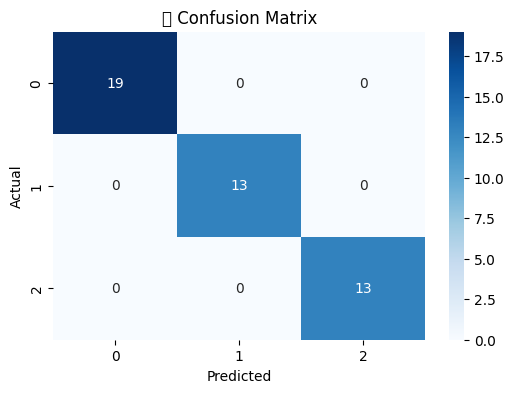

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


print("🔍 Classification Metrics")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall   :", recall_score(y_test, y_pred, average='macro'))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("📊 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128256 (\N{TWISTED RIGHTWARDS ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


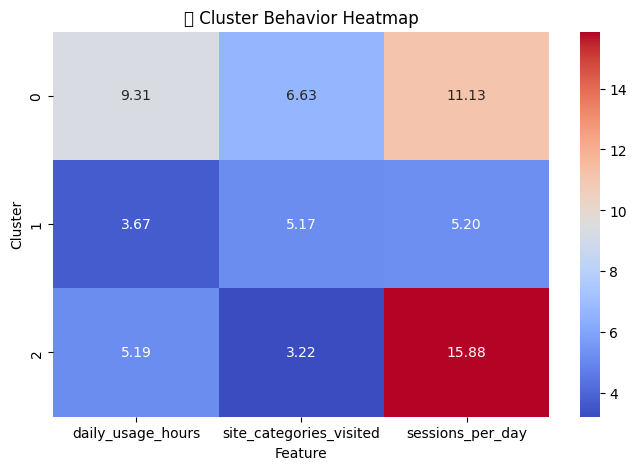

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = df.drop(columns=['Label'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_summary = df.groupby('Cluster').mean()

plt.figure(figsize=(8, 5))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔀 Cluster Behavior Heatmap")
plt.xlabel("Feature")
plt.ylabel("Cluster")
plt.show()
